<a href="https://colab.research.google.com/github/Gauravjha2900/Charts_CNN_Based_MultiClassification/blob/main/fine_tunning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##VGG 16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [4]:
# import the libraries as shown below

import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

**Feature Extraction using pretrained networks**

We will use pretrained VGG16 model. This model was trained on ImageNet dataset for 1000 classes. Features learned by the initial layers of VGG16 model are generic enough to apply for other image classification tasks.

Let's go with feature extraction using pretrained VGG16 model.

In [32]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chart_dataset/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 subset="training",
                                                 class_mode = 'categorical')

validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chart/train2/val',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                subset="validation",
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chart/train2/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')




Found 800 images belonging to 5 classes.
Found 40 images belonging to 5 classes.
Found 50 images belonging to 1 classes.


In [35]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [36]:
#Give dataset path
train_path = '/content/drive/MyDrive/chart_dataset/train'
test_path = '/content/drive/MyDrive/chart/train2/test'

In [38]:
# useful for getting number of classes
folders = glob('/content/drive/MyDrive/chart_dataset/train/*')
print(len(folders))

5


Load the VGG16 model's convolutional base.
parameter include_top=False lets us drop the trained classifier from VGG16 model.

In [39]:
conv_base = VGG16(
                    weights = 'imagenet',
                    include_top = False,
                    input_shape = (128,128,3)
                 )

In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Let's define the model with it's own classifeir on top of VGG16 convolutional base.

In [52]:
from keras import models, layers, optimizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='softmax'))

In [54]:
opt = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [55]:
history = model.fit_generator(
                                training_set,
                                steps_per_epoch = training_set.samples // 32,
                                epochs = 12,
                                validation_data = validation_set,
                                validation_steps = validation_set.samples // 32,
)

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


25/25 [==============================] - 6s 206ms/step - loss: 0.3065 - acc: 0.9137 - val_loss: 0.0101 - val_acc: 1.0000
Epoch 2/12
25/25 [==============================] - 5s 191ms/step - loss: 0.0121 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 3/12
25/25 [==============================] - 5s 191ms/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 4/12
25/25 [==============================] - 5s 193ms/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 5/12
25/25 [==============================] - 5s 192ms/step - loss: 0.0100 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 6/12
25/25 [==============================] - 5s 193ms/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 7/12
25/25 [==============================] - 5s 192ms/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 8/12
25/25 [==============================] - 5s 191ms/step - loss: 0.0101 - acc:

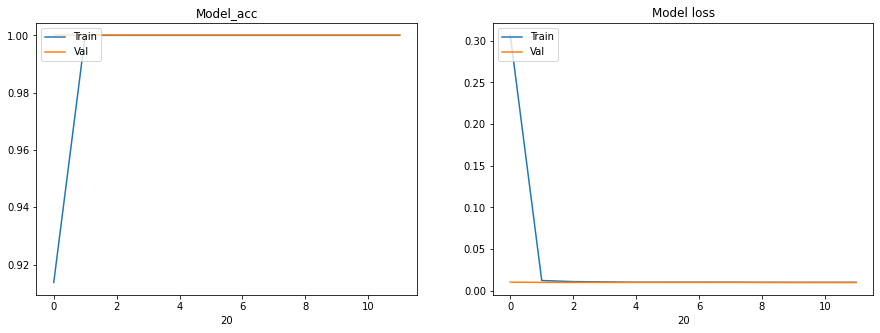

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set_title('Model_acc')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='20')

In [63]:
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
print("Average Validation accuracy: ", np.mean(val_acc))
print("Average Validation loss: ", np.mean(val_loss))

Average Validation accuracy:  1.0
Average Validation loss:  0.009844273949662844


In [66]:
import math
test_acc, test_loss = model.evaluate_generator(test_set, steps=test_set.samples // 32)
print("Test Accuracy: ", math.ceil(test_acc*100)/100)

Test Accuracy:  87.14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  
